In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from analysis import load_data, get_flipped, get_trial_stats, get_correct_scores, get_flipping_stats

In [2]:
test_df, experiment_df = load_data()

In [3]:
experiment_df.shape[0]

955

In [4]:
experiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   trial            955 non-null    int64   
 1   start_time       955 non-null    float64 
 2   rt               955 non-null    float64 
 3   correct          955 non-null    bool    
 4   fact_id          955 non-null    int64   
 5   question         955 non-null    string  
 6   answer           955 non-null    string  
 7   flipped          955 non-null    bool    
 8   alpha            955 non-null    float64 
 9   activation       955 non-null    float64 
 10  flip_alpha       955 non-null    float64 
 11  flip_activation  955 non-null    float64 
 12  subject          955 non-null    category
dtypes: bool(2), category(1), float64(6), int64(2), string(2)
memory usage: 77.9 KB


In [ ]:
test_df.groupby("subject")["correct"].value_counts().xs(True, level=1)

In [ ]:
experiment_df.groupby("subject")["correct"].value_counts()

In [ ]:
test_df.groupby("subject")["correct"].value_counts(normalize=True).xs(True,level=1).mean()

In [ ]:
experiment_df[experiment_df["rt"] < float("inf")].groupby("subject")["rt"].describe()

In [ ]:
experiment_df.groupby("subject")["flipped"].value_counts()

In [ ]:
experiment_df[experiment_df["flipped"] == True]

In [ ]:
experiment_df["subject"].value_counts()

In [ ]:
df = get_flipped(test_df, is_test=True)
get_correct_scores(df)

In [ ]:
get_correct_scores(test_df)

In [ ]:
experiment_df.groupby("subject")["flipped"].value_counts(normalize=True).xs(True,level=1)

In [ ]:
print(get_correct_scores(experiment_df))

In [ ]:
print(get_flipping_stats(experiment_df[~experiment_df["subject"].isin(["subject_8", "subject_9"])], is_test=False))

subject
subject_4    50.819672
subject_5    43.023256
subject_7    40.776699
subject_6    46.846847
subject_2    25.757576
subject_3    49.523810
subject_1    22.972973
subject_0    59.000000
Name: flipped, dtype: float64


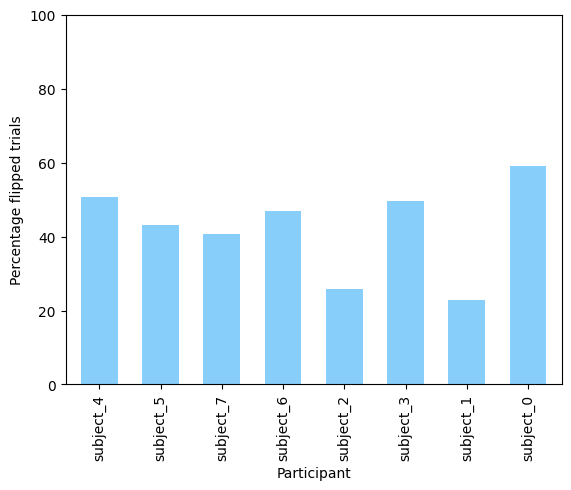

In [24]:
flipped = experiment_df[~experiment_df["subject"].isin(["subject_8", "subject_9"])].groupby("subject", observed=True)["flipped"].value_counts(sort=False,normalize=True).xs(True, level=1) * 100

fig = plt.figure()

ax1 = fig.add_subplot(111)

print(flipped)

flipped.plot(kind="bar", color="lightskyblue", ax=ax1, width = 0.6,)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Percentage flipped trials")
ax1.set_ybound(upper=100)

fig.savefig("flipped.png", dpi=300, bbox_inches = "tight", transparent=True)

In [ ]:
exp_stats = get_trial_stats(experiment_df)

test_stats = get_trial_stats(test_df)

print(test_stats)
print(exp_stats)

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

exp_stats["count"].plot(kind="bar", color="blue", ax=ax1, width = 0.4, position=1)

test_stats["count"].plot(kind="bar", color="orange", ax=ax2, width = 0.4, position=0)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Number of Trials")
ax2.set_ylabel("Number of Learned Words")
ax2.set_ybound(upper=130)
ax1.set_ybound(upper=130)

fig.savefig("trials.png", dpi=300, bbox_inches = "tight", transparent=True)

In [ ]:
exp_stats = get_correct_scores(experiment_df)

test_stats = get_correct_scores(test_df)

print(test_stats)
print(exp_stats)

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

test_freq_perc = test_stats["frequency"] * 100

exp_freq_perc = exp_stats["frequency"] * 100

exp_freq_perc.plot(kind="bar", color="lightskyblue", ax=ax1, width = 0.4, position=1)

test_freq_perc.plot(kind="bar", color="lightsalmon", ax=ax2, width = 0.4, position=0)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Percentage correct trials")
ax2.set_ylabel("Percentage correct test questions")
ax2.set_ybound(upper=100)
ax1.set_ybound(upper=100)

fig.savefig("correct.png", dpi=300, bbox_inches = "tight", transparent=True)

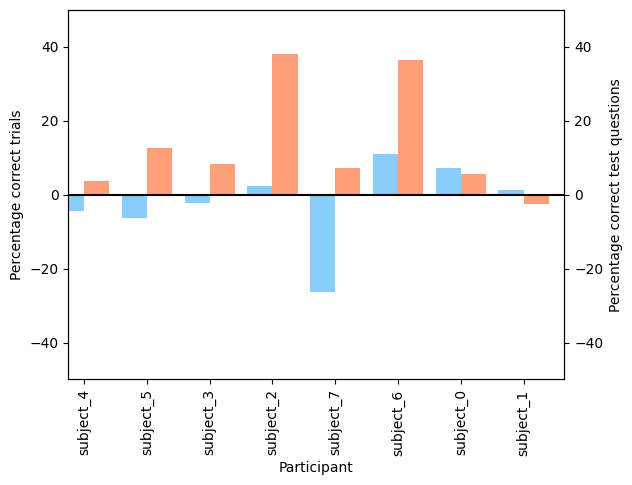

In [12]:
test_flipped = get_flipped(test_df, is_test=True)

exp_flipped = get_flipped(experiment_df)

exp_stats_flipped = get_correct_scores(exp_flipped[~exp_flipped["subject"].isin(["subject_8", "subject_9"])])

test_stats_flipped = get_correct_scores(test_flipped[~test_flipped["subject"].isin(["subject_8", "subject_9"])])

exp_stats = get_correct_scores(experiment_df[~experiment_df["subject"].isin(["subject_8", "subject_9"])])

test_stats = get_correct_scores(test_df[~test_df["subject"].isin(["subject_8", "subject_9"])])

#print(test_stats["frequency"])
#print(exp_stats["frequency"])

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

test_flip_freq_perc = test_stats_flipped["frequency"] * 100 - test_stats["frequency"] * 100

exp_flip_freq_perc = exp_stats_flipped["frequency"] * 100 - exp_stats["frequency"] * 100


exp_flip_freq_perc.plot(kind="bar", color="lightskyblue", ax=ax1, width = 0.4, position=1)

test_flip_freq_perc.plot(kind="bar", color="lightsalmon", ax=ax2, width = 0.4, position=0)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Percentage correct trials")
ax2.set_ylabel("Percentage correct test questions")
ax2.set_ybound(upper=50, lower=-50)
ax1.set_ybound(upper=50, lower=-50)

plt.axhline(0, color="black")

fig.savefig("correct_flipped2.png", dpi=300, bbox_inches = "tight", transparent=True)

subject
subject_9    11.111111
subject_8    -7.142857
Name: correct, dtype: float64
1.9841269841269877
12.907504735944935


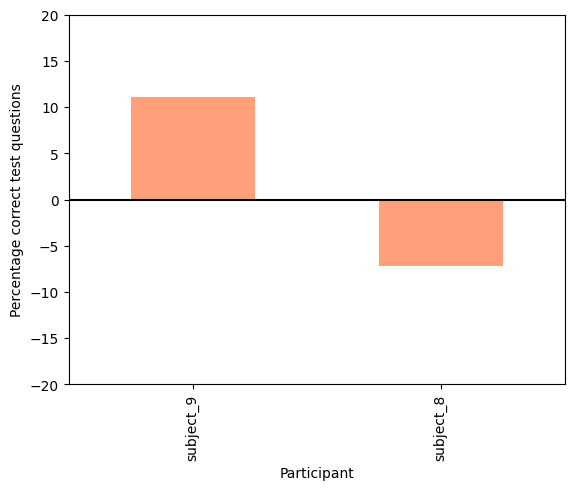

In [15]:
test_flipped = get_flipped(test_df, is_test=True)


test_stats_flipped = get_correct_scores(test_flipped[test_flipped["subject"].isin(["subject_8", "subject_9"])])


test_stats = get_correct_scores(test_df[test_df["subject"].isin(["subject_8", "subject_9"])])

test_flip_freq_perc = test_stats_flipped["frequency"] * 100 - test_stats["frequency"] * 100

print(test_flip_freq_perc)
print(test_flip_freq_perc.mean())
print(test_flip_freq_perc.std())

fig = plt.figure()

ax1 = fig.add_subplot(111)

test_flip_freq_perc.plot(kind="bar", color="lightsalmon", ax=ax1, width = 0.5)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Percentage correct test questions")
ax1.set_ybound(upper=20, lower=-20)

plt.axhline(0, color="black")

fig.savefig("correct_flipped3.png", dpi=300, bbox_inches = "tight", transparent=True)

-0.0069841269841269815


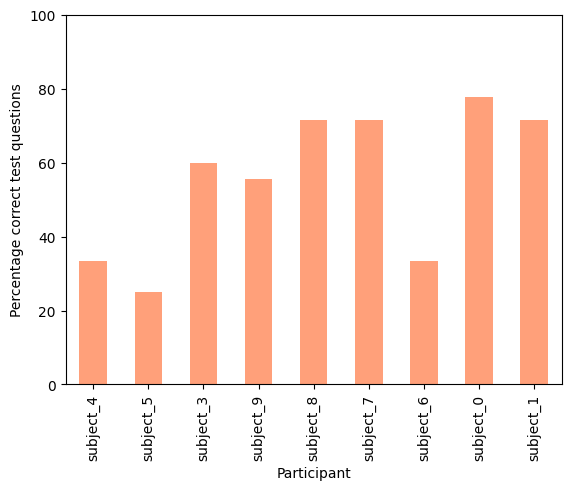

In [23]:
test_flipped = get_flipped(test_df, is_test=True, reverse=True)


test_stats_flipped = get_correct_scores(test_flipped[~test_flipped["subject"].isin(["subject_8", "subject_9", "subject_2", "subject_4", "subject_5"])])

test_stats_non_flipped = get_correct_scores(test_flipped[test_flipped["subject"].isin(["subject_8", "subject_9"])])

test_stats_all = get_correct_scores(test_flipped)

diff = test_stats_flipped["mean"] - test_stats_non_flipped["mean"]

print(diff)

test_stats_all_freq = test_stats_all["frequency"] * 100


fig = plt.figure()

ax1 = fig.add_subplot(111)

test_stats_all_freq.plot(kind="bar", color="lightsalmon", ax=ax1, width = 0.5)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Percentage correct test questions")
ax1.set_ybound(upper=100)

#plt.axhline(0, color="black")

fig.savefig("correct_flipped4.png", dpi=300, bbox_inches = "tight", transparent=True)

In [ ]:
test_flipped = get_flipped(test_df, is_test=True)

exp_flipped = get_flipped(experiment_df)

exp_stats_flipped = get_correct_scores(exp_flipped)

test_stats_flipped = get_correct_scores(test_flipped)

print(exp_stats_flipped)



In [ ]:
print(test_stats_flipped)